In [4]:
import os 

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

In [6]:
torch.__version__

'2.7.1+cu126'

In [7]:
torch.cuda.is_available() 

True

In [8]:
cifar100_labels = {
    0:  'apple',
    1:  'aquarium_fish',
    2:  'baby',
    3:  'bear',
    4:  'beaver',
    5:  'bed',
    6:  'bee',
    7:  'beetle',
    8:  'bicycle',
    9:  'bottle',
    10: 'bowl',
    11: 'boy',
    12: 'bridge',
    13: 'bus',
    14: 'butterfly',
    15: 'camel',
    16: 'can',
    17: 'castle',
    18: 'caterpillar',
    19: 'cattle',
    20: 'chair',
    21: 'chimpanzee',
    22: 'clock',
    23: 'cloud',
    24: 'cockroach',
    25: 'couch',
    26: 'crab',
    27: 'crocodile',
    28: 'cup',
    29: 'dinosaur',
    30: 'dolphin',
    31: 'elephant',
    32: 'flatfish',
    33: 'forest',
    34: 'fox',
    35: 'girl',
    36: 'hamster',
    37: 'house',
    38: 'kangaroo',
    39: 'keyboard',
    40: 'lamp',
    41: 'lawn_mower',
    42: 'leopard',
    43: 'lion',
    44: 'lizard',
    45: 'lobster',
    46: 'man',
    47: 'maple_tree',
    48: 'motorcycle',
    49: 'mountain',
    50: 'mouse',
    51: 'mushroom',
    52: 'oak_tree',
    53: 'orange',
    54: 'orchid',
    55: 'otter',
    56: 'palm_tree',
    57: 'pear',
    58: 'pickup_truck',
    59: 'pine_tree',
    60: 'plain',
    61: 'plate',
    62: 'poppy',
    63: 'porcupine',
    64: 'possum',
    65: 'rabbit',
    66: 'raccoon',
    67: 'ray',
    68: 'road',
    69: 'rocket',
    70: 'rose',
    71: 'sea',
    72: 'seal',
    73: 'shark',
    74: 'shrew',
    75: 'skunk',
    76: 'skyscraper',
    77: 'snail',
    78: 'snake',
    79: 'spider',
    80: 'squirrel',
    81: 'streetcar',
    82: 'sunflower',
    83: 'sweet_pepper',
    84: 'table',
    85: 'tank',
    86: 'telephone',
    87: 'television',
    88: 'tiger',
    89: 'tractor',
    90: 'train',
    91: 'trout',
    92: 'tulip',
    93: 'turtle',
    94: 'wardrobe',
    95: 'whale',
    96: 'willow_tree',
    97: 'wolf',
    98: 'woman',
    99: 'worm'
}


In [9]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

def show_images_of_class(dataset, target_class, num_images=20, class_names=None):
    """
    Display images of a given class from the dataset.

    Args:
        dataset: PyTorch dataset, should return (image, label) tuples.
        target_class: int, the class label to filter images by.
        num_images: int, how many images to show.
        class_names: list or dict, optional, maps class indices to names.
    """
    imgs_to_show = []
    count = 0

    for img, label in dataset:
        if label == target_class:
            imgs_to_show.append(img)
            count += 1
            if count == num_images:
                break

    if count == 0:
        print(f"No images found for class {target_class}")
        return

    # Prepare grid display
    ncols = 5
    nrows = (count + ncols - 1) // ncols
    plt.figure(figsize=(3 * ncols, 3 * nrows))

    for i, img in enumerate(imgs_to_show):
        plt.subplot(nrows, ncols, i + 1)
        # Assuming img is normalized tensor; denormalize if needed
        # Here assuming ImageNet normalization, adjust if different:
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        img = img.clone()
        for t, m, s in zip(img, mean, std):
            t.mul_(s).add_(m)
        img = img.clamp(0, 1)
        plt.imshow(TF.to_pil_image(img))
        label_name = target_class if class_names is None else class_names[target_class]
        plt.title(f"Class: {label_name}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


In [10]:
### import archetecture of models 

from model_codes_cifar100.vgg_cifar100 import * 
from model_codes_cifar100.resnet_cifar100 import * 
from model_codes_cifar100.densenet_cifar100 import * 
from model_codes_cifar100.mobilenetv2_cifar100 import * 
from model_codes_cifar100.googlenet_cifar100 import * 
from model_codes_cifar100.inceptionv3_cifar100 import * 

In [11]:
## getting the archetecture of model from models.vgg_models 
vgg19_model = VGG('VGG19')
resnet50_model = resnet50() 
densenet169_model = densenet169() 
mobilenetV2_model = MobileNetV2() 
googlenet_model = googlenet()  
inceptionv3_model = inceptionv3()

In [12]:
trained_models_directory = "trained_models_cifar100/" 
device_name = 'cuda:0' 

vgg_19_model_file_name = "vgg19_cifar100.pth" 
resnet50_model_file_name = "resnet50_cifar100.pth" 
densenet169_model_file_name = "densenet169_cifar100.pth" 
mobilenetV2_model_file_name = "mobilenetv2_cifar100.pth" 
googlenet_model_file_name = "googlenet_cifar100.pth" 
inception_model_file_name = "inceptionv3_cifar100.pth"

vgg19_path = os.path.join(trained_models_directory, vgg_19_model_file_name) 
resnet50_path = os.path.join(trained_models_directory, resnet50_model_file_name) 
densenet169_path = os.path.join(trained_models_directory, densenet169_model_file_name) 
mobilenetV2_path = os.path.join(trained_models_directory, mobilenetV2_model_file_name) 
googlenet_path = os.path.join(trained_models_directory, googlenet_model_file_name) 
inception_path = os.path.join(trained_models_directory, inception_model_file_name)

## load the model 
vgg19_model.load_state_dict(torch.load(vgg19_path, map_location=device_name)['net'])
resnet50_model.load_state_dict(torch.load(resnet50_path, map_location=device_name)['net'])
densenet169_model.load_state_dict(torch.load(densenet169_path, map_location=device_name)['net'])
mobilenetV2_model.load_state_dict(torch.load(mobilenetV2_path, map_location=device_name)['net'])
googlenet_model.load_state_dict(torch.load(googlenet_path, map_location=device_name)['net'])
inceptionv3_model.load_state_dict(torch.load(inception_path, map_location=device_name)['net'])

<All keys matched successfully>

In [13]:
trained_pool = [vgg19_model.eval(), 
                resnet50_model.eval(), 
                densenet169_model.eval(), 
                # mobilenetV2_model.eval(), 
                googlenet_model.eval(), 
                inceptionv3_model.eval(), 
               ]


model_names = [
    "VGG19",
    "ResNet50",
    "DenseNet169",
    # "MobileNetV2",
    "GoogleNet", 
    "InceptionV3"
]

### Load Dataset 

In [14]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Load the full CIFAR10 test set (10,000 samples)
full_testset = torchvision.datasets.CIFAR100(
    root='./data', train=False, download=True, transform=transform)

# Calculate split sizes
val_size = int(0.9 * len(full_testset))  # 7000
test_size = len(full_testset) - val_size  # 3000

# Randomly split into validation and test subsets
val_set, test_set = random_split(
    full_testset, [val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

# Create DataLoaders
valloader = DataLoader(val_set, batch_size=100, shuffle=False, num_workers=2)
testloader = DataLoader(test_set, batch_size=100, shuffle=False, num_workers=2)

print(f"Validation samples: {len(val_set)}")
print(f"Test samples: {len(test_set)}")

Validation samples: 9000
Test samples: 1000


### Evalaute base models 

In [15]:
def evaluate_model(model, dataloader, device):
    model.eval()
    model.to(device)

    correct = 0
    total = 0
    total_loss = 0.0

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = F.cross_entropy(outputs, labels)
            total_loss += loss.item() * images.size(0)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = total_loss / total
    accuracy = 100 * correct / total
    return avg_loss, accuracy


def evaluate_model_pool(model_pool, dataloader, device, model_names=None):
    if model_names is None:
        model_names = [f"Model {i+1}" for i in range(len(model_pool))]

    for model, name in zip(model_pool, model_names):
        loss, acc = evaluate_model(model, dataloader, device)
        print(f"{name:<15} → Accuracy: {acc:.2f}%, Loss: {loss:.4f}")


In [16]:
evaluate_model_pool(trained_pool, testloader, device_name, model_names)

VGG19           → Accuracy: 71.20%, Loss: 1.5808
ResNet50        → Accuracy: 76.80%, Loss: 0.9865
DenseNet169     → Accuracy: 77.10%, Loss: 1.0431
GoogleNet       → Accuracy: 74.50%, Loss: 1.0952
InceptionV3     → Accuracy: 76.10%, Loss: 1.0398


### VisionDES model 

In [53]:
from torch.nn.functional import softmax, cosine_similarity
from collections import Counter
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF
import torch
import torch.nn as nn
import numpy as np
import faiss
from torch.utils.data import DataLoader
from tqdm import tqdm
import clip

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


import torch
import torch.nn as nn

def get_last_linear_layer(model):
    """
    Try to find the last Linear layer in the model,
    using common attribute names and fallback to scanning modules.
    """
    name = model.__class__.__name__.lower()

    # Common last layer attribute names to try (ViT, EfficientNet, etc)
    candidate_attrs = ['head', 'heads', 'classifier', 'fc', 'mlp_head']

    for attr in candidate_attrs:
        if hasattr(model, attr):
            layer = getattr(model, attr)
            # If it's directly a Linear layer
            if isinstance(layer, nn.Linear):
                return layer
            # If Sequential or Module, find last Linear inside it
            if isinstance(layer, nn.Sequential) or isinstance(layer, nn.Module):
                # Find last Linear inside this attribute recursively
                last_linear = None
                for child in reversed(list(layer.modules())):
                    if isinstance(child, nn.Linear):
                        last_linear = child
                        break
                if last_linear is not None:
                    return last_linear

    # Fallback: scan all modules and pick the last Linear
    last_linear = None
    for m in model.modules():
        if isinstance(m, nn.Linear):
            last_linear = m
    if last_linear is not None:
        return last_linear

    raise RuntimeError("No Linear layer found in model")


def get_features_before_last_linear(model, x):
    features = {}

    def find_last_linear(module):
        last_linear = None
        for m in module.modules():
            if isinstance(m, torch.nn.Linear):
                last_linear = m
        return last_linear

    last_linear = find_last_linear(model)
    if last_linear is None:
        raise RuntimeError("No Linear layer found in model")

    def hook(module, input, output):
        features['feat'] = input[0].detach()

    handle = last_linear.register_forward_hook(hook)

    model.eval()
    with torch.no_grad():
        _ = model(x)

    handle.remove()

    if 'feat' not in features:
        raise RuntimeError("Failed to capture features from last linear layer")

    return features['feat']
    

class VisionDES:
    def __init__(self, dsel_dataset, pool, resnet50_model):
        self.dsel_dataset = dsel_dataset
        self.dsel_loader = DataLoader(dsel_dataset, batch_size=32, shuffle=False)
        self.pool = pool
        self.suspected_model_votes = []

        # Use your trained ResNet50 as embedding extractor
        self.resnet50 = resnet50_model.to(device)
        self.resnet50.eval()

        # Remove classification head to get embeddings
        self.embedding_extractor = nn.Sequential(*list(self.resnet50.children())[:-1]).to(device)
        self.embedding_extractor.eval()

    
    def visualize_test_and_roc(self, test_img, roc_imgs, local_labels, class_names=None):
        def denormalize(img_tensor, mean, std):
            mean = torch.tensor(mean).view(-1, 1, 1).to(img_tensor.device)
            std = torch.tensor(std).view(-1, 1, 1).to(img_tensor.device)
            return img_tensor * std + mean
        """
        Display test image and its Region of Competence (RoC) images with labels.
        
        Args:
            test_img (torch.Tensor): Shape (C, H, W)
            roc_imgs (torch.Tensor): Shape (k, C, H, W)
            local_labels (np.ndarray): Shape (k,)
            class_names (list): Optional list of class names
        """
        mean = [0.485, 0.456, 0.406]
        std  = [0.229, 0.224, 0.225] 

        k = roc_imgs.size(0)
        ncols = min(k, 5)
        nrows = 1 + (k + ncols - 1) // ncols  # one row for test image + RoC images
    
        plt.figure(figsize=(3 * ncols, 3 * nrows))
    
        # Plot test image
        plt.subplot(nrows, ncols, 1)
        denorm_img = denormalize(test_img, mean, std).clamp(0, 1)
        img_np = TF.to_pil_image(denorm_img.cpu())
        plt.imshow(img_np)
        plt.title("Test Image")
        plt.axis("off")
    
        # Plot RoC images
        for i in range(k):
            plt.subplot(nrows, ncols, i + 2)
            denorm_img = denormalize(roc_imgs[i], mean, std).clamp(0, 1)
            img_np = TF.to_pil_image(denorm_img.cpu())
            label = local_labels[i]
            if class_names:
                label = class_names[label]
            plt.imshow(img_np)
            plt.title(f"RoC #{i+1}\nLabel: {label}")
            plt.axis("off")
    
        plt.tight_layout()
        plt.show()
        

    def resnet_embedder(self, images):
        """Extract embeddings from trained ResNet50."""
        with torch.no_grad():
            feats = self.embedding_extractor(images)  # [B, C, 1, 1]
            feats = feats.view(feats.size(0), -1)     # [B, C]
        return feats

    def fit(self):
        dsel_embeddings = []
        dsel_labels = []

        with torch.no_grad():
            for imgs, labels in tqdm(self.dsel_loader, desc="Extracting DSEL embeddings"):
                imgs = imgs.to(device)
                embs = self.resnet_embedder(imgs).cpu()
                dsel_embeddings.append(embs)
                dsel_labels.append(labels)

        dsel_embeddings_tensor = torch.cat(dsel_embeddings).detach().cpu()
        cls_embeddings = np.ascontiguousarray(dsel_embeddings_tensor.numpy(), dtype='float32')
        self.dsel_embeddings = cls_embeddings
        self.dsel_labels = torch.cat(dsel_labels).numpy()

        # Build FAISS index
        embedding_dim = cls_embeddings.shape[1]
        self.index = faiss.IndexFlatL2(embedding_dim)
        self.index.add(cls_embeddings)

    def get_output_size(self, model):
        """Get classifier output size."""
        if hasattr(model, 'fc'):
            return model.fc.out_features
        elif hasattr(model, 'classifier'):
            if isinstance(model.classifier, nn.Sequential):
                return model.classifier[-1].out_features
            else:
                return model.classifier.out_features
        else:
            raise AttributeError("Cannot determine output size of the model.")

    def predict_weighted_robust_feature_similarity(self, test_img, k=7, return_logits=False, explain=False):
        # 1️⃣ ResNet50 embedding for test image
        img_for_resnet = test_img.unsqueeze(0).to(device)
        with torch.no_grad():
            test_emb = self.resnet_embedder(img_for_resnet).cpu().numpy().astype('float32')

        # 2️⃣ Find RoC from FAISS
        _, neighbors = self.index.search(test_emb, k)
        neighbor_idxs = neighbors[0]
        local_labels = np.array(self.dsel_labels[neighbor_idxs]).flatten()

        # 3️⃣ Get RoC images
        with torch.no_grad():
            roc_imgs = torch.stack([self.dsel_dataset[idx][0] for idx in neighbor_idxs]).to(device)

        competences = []
        soft_outputs = []
        feature_similarities = []

        # 4️⃣ Evaluate pool
        for clf in self.pool:
            clf.eval()
            with torch.no_grad():
                # print(clf.__class__.__name__)
                outputs = clf(roc_imgs)
                preds = outputs.argmax(dim=1).cpu().numpy()
                correct = (preds == local_labels).sum()
                competence = correct / k
                competences.append(competence)

                logits = clf(test_img.unsqueeze(0).to(device)).squeeze(0)
                probs = softmax(logits, dim=0)
                soft_outputs.append(probs)

                # Feature similarity using ResNet embeddings
                test_feat = get_features_before_last_linear(clf, test_img.unsqueeze(0).to(device))
                roc_feats = get_features_before_last_linear(clf, roc_imgs)
                mean_feat = roc_feats.mean(dim=0, keepdim=True)

                sim = cosine_similarity(test_feat / test_feat.norm(), mean_feat / mean_feat.norm(), dim=1)
                feature_similarities.append(sim.item())

        # 5️⃣ Combine scores
        alpha = 1.0
        combined_scores = [c * (s / alpha) for c, s in zip(competences, feature_similarities)]

        total_score = sum(combined_scores)
        if total_score == 0:
            weights = [1.0 / len(self.pool)] * len(self.pool)
        else:
            weights = [s / total_score for s in combined_scores]

        # 6️⃣ Weighted aggregation
        num_classes = self.get_output_size(self.pool[0])
        weighted_logits = torch.zeros(num_classes).to(device)
        for prob, weight in zip(soft_outputs, weights):
            weighted_logits += weight * prob

        min_sim_idx = int(np.argmin(feature_similarities))
        self.suspected_model_votes.append(min_sim_idx)

        # Step 8: Optional explainability
        if explain:
            print("\nExplainability Report:")
            for idx, (clf, comp, sim, weight, prob) in enumerate(zip(self.pool, competences, feature_similarities, weights, soft_outputs)):
                pred_class = prob.argmax().item()
                conf = prob[pred_class].item()
                topk = torch.topk(prob, k=5)
                print(f"Model #{idx}: {clf.__class__.__name__}")
                print(f"  - Competence: {comp:.4f}")
                print(f"  - Feature similarity: {sim:.4f}")
                print(f"  - Combined weight: {weight:.4f}")
                print(f"  - Predicted class: {pred_class} with confidence {conf:.4f}")
                print(f"  - Top-5: {topk.indices.tolist()} → {[round(p.item(), 3) for p in topk.values]}")
                print("-" * 50)
    
            print(f"\n🧠 Final prediction: {weighted_logits.argmax().item()}")
            top5 = torch.topk(weighted_logits, k=5)
            print(f"🔝 Top-5 predictions:")
            for i in range(5):
                print(f"  - Class {top5.indices[i].item()}: {top5.values[i].item():.4f}")
    
            print("\nModel weight distribution:")
            for idx, w in enumerate(weights):
                print(f"  Model #{idx}: {w:.4f}")
            print(f"Suspected attacked model: Model #{min_sim_idx} ({self.pool[min_sim_idx].__class__.__name__})")
    
            print("\nRoC visualization:")
            self.visualize_test_and_roc(test_img.squeeze(0), roc_imgs, local_labels)

            
            to_pil = transforms.ToPILImage()
            pil_image = to_pil(test_img.cpu()) 
            clip_model, preprocess = clip.load("ViT-B/32", device=device) 
            
            tokens = [] 
            for i in range(5): 
                top_class = cifar100_labels[top5.indices[i].item()]  
                tokens.append(f"Image has {top_class}") 
                
            image = preprocess(pil_image).unsqueeze(0).to(device)     
            text = clip.tokenize(tokens).to(device)

            with torch.no_grad():
                image_features = clip_model.encode_image(image)
                text_features = clip_model.encode_text(text)
                
                logits_per_image, logits_per_text = clip_model(image, text)
                probs = logits_per_image.softmax(dim=-1).cpu().numpy()
                
            for i in range(5): 
                print(f"{tokens[i]}: {probs[0][i]}")
            
            

        if return_logits:
            return weighted_logits
        return weighted_logits.argmax().item()

In [54]:
des_model = VisionDES(val_set, trained_pool, resnet50_model.eval())
# des_model = VisionDES(val_set, trained_pool)  

In [55]:
des_model.fit()

Extracting DSEL embeddings: 100%|█████████████████████████████████████| 282/282 [00:03<00:00, 74.69it/s]


In [20]:
def evaluate_des(des_model, dataloader):
    total = 0
    correct = 0
    
    with torch.no_grad():
        for imgs, labels in tqdm(dataloader, desc="Testing VisionDES"):
            imgs, labels = imgs.to(device), labels.to(device)
            
            # DES prediction (you can switch to robust or explainable prediction)
            preds = []
            for img in imgs:
                pred = des_model.predict_weighted_robust_feature_similarity(
                    img, k=7, return_logits=False, explain=False
                )
                preds.append(pred)
            
            preds = torch.tensor(preds).to(device)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    
    acc = correct / total
    print(f"✅ Test Accuracy: {acc:.4f}")
    return acc

In [287]:
def evaluate_des_fails(des_model, data):
    failed_indices = [] 
    
    with torch.no_grad():
        for i in tqdm(range(len(data))): 
            img, label = data[i][0].to(device), data[i][1]
            pred = des_model.predict_weighted_robust_feature_similarity(
                    img, k=7, return_logits=False, explain=False
                ) 

            if pred != label: 
                failed_indices.append(i) 
    return failed_indices

In [288]:
# =========================
# Run Test
# =========================
# Assume `vision_des` is already created & trained
test_acc = evaluate_des(des_model, testloader)

Testing VisionDES:   0%|                                                         | 0/10 [00:11<?, ?it/s]


KeyboardInterrupt: 

In [254]:
failed_samples = evaluate_des_fails(des_model, test_set)

100%|███████████████████████████████████████████████████████████████| 1000/1000 [02:58<00:00,  5.62it/s]


In [255]:
print(failed_samples) 

[4, 7, 8, 10, 12, 24, 25, 28, 31, 32, 37, 39, 40, 41, 43, 44, 47, 52, 55, 69, 76, 78, 79, 92, 98, 106, 111, 113, 125, 128, 132, 137, 141, 147, 148, 149, 173, 177, 186, 195, 202, 205, 209, 211, 212, 216, 217, 224, 225, 227, 228, 233, 240, 241, 246, 252, 253, 256, 262, 268, 272, 276, 290, 294, 297, 302, 310, 311, 313, 326, 331, 334, 343, 346, 348, 349, 355, 359, 364, 368, 373, 375, 384, 389, 399, 404, 406, 409, 415, 421, 425, 426, 431, 433, 437, 442, 446, 450, 451, 457, 469, 473, 475, 480, 500, 503, 513, 516, 524, 529, 534, 544, 546, 551, 558, 562, 567, 572, 580, 588, 593, 594, 607, 619, 621, 622, 624, 636, 642, 643, 645, 659, 667, 673, 675, 676, 679, 681, 691, 695, 701, 704, 712, 717, 729, 734, 739, 741, 749, 750, 753, 757, 762, 769, 770, 777, 780, 786, 788, 789, 790, 792, 793, 794, 797, 798, 800, 802, 803, 813, 816, 832, 840, 846, 848, 854, 859, 860, 866, 868, 870, 882, 883, 886, 889, 890, 897, 905, 913, 914, 917, 919, 922, 924, 925, 929, 938, 942, 947, 949, 952, 955, 959, 960, 962, 97

In [256]:
len(failed_samples)

209

True class: 31

Explainability Report:
Model #0: VGG
  - Competence: 0.8571
  - Feature similarity: 0.7815
  - Combined weight: 0.1863
  - Predicted class: 31 with confidence 0.5673
  - Top-5: [31, 19, 29, 52, 38] → [0.567, 0.27, 0.038, 0.038, 0.032]
--------------------------------------------------
Model #1: ResNet
  - Competence: 1.0000
  - Feature similarity: 0.9354
  - Combined weight: 0.2601
  - Predicted class: 3 with confidence 0.4959
  - Top-5: [3, 31, 19, 52, 21] → [0.496, 0.384, 0.028, 0.012, 0.012]
--------------------------------------------------
Model #2: DenseNet
  - Competence: 0.7143
  - Feature similarity: 0.8660
  - Combined weight: 0.1720
  - Predicted class: 3 with confidence 0.9684
  - Top-5: [3, 31, 52, 21, 75] → [0.968, 0.019, 0.003, 0.001, 0.001]
--------------------------------------------------
Model #3: GoogleNet
  - Competence: 0.7143
  - Feature similarity: 0.8581
  - Combined weight: 0.1704
  - Predicted class: 31 with confidence 0.6910
  - Top-5: [31, 1

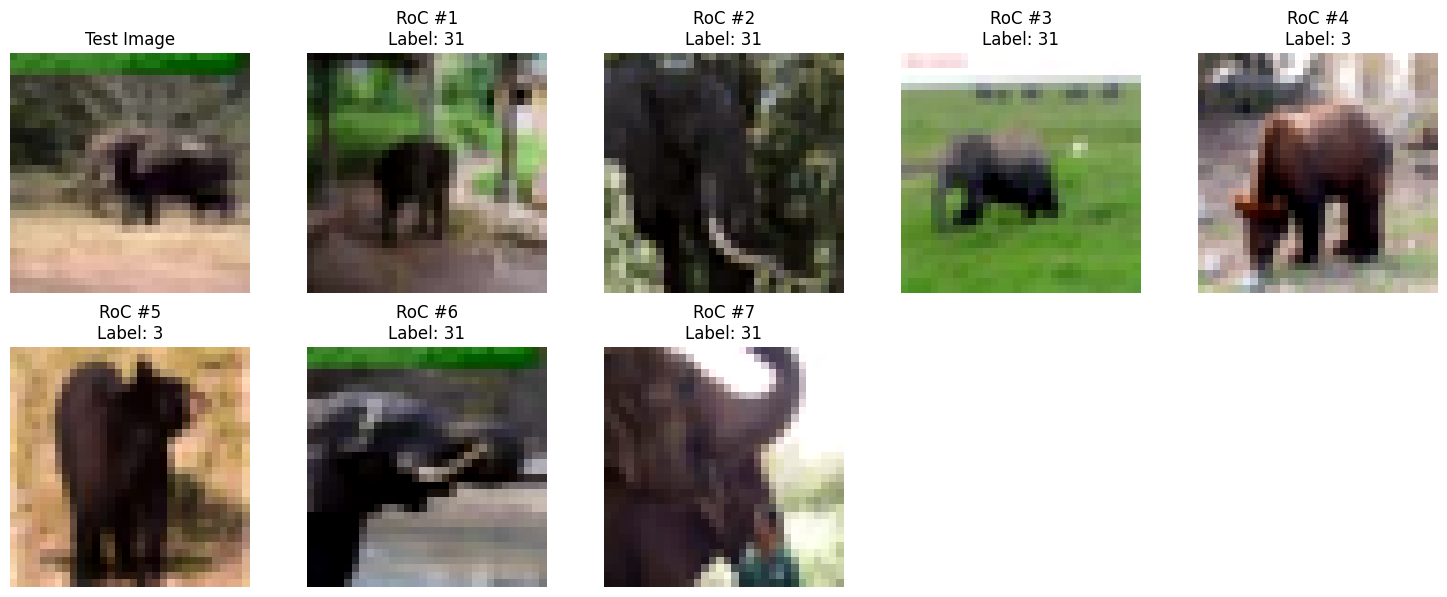

Image has bear: 0.145751953125
Image has elephant: 0.0911865234375
Image has cattle: 0.1551513671875
Image has oak_tree: 0.40869140625
Image has dinosaur: 0.19921875


3

In [64]:
index = 55

print(f"True class: {test_set[index][1]}")

des_model.predict_weighted_robust_feature_similarity(test_set[index][0], explain=True) 

In [223]:
cifar100_labels[39]

'keyboard'

In [221]:
cifar100_labels[4]

'beaver'

In [184]:
cifar100_labels[3]

'bear'

In [239]:
pred = resnet50_model(test_set[index][0].unsqueeze(0).to(device))
pred.argmax()

tensor(99, device='cuda:0')

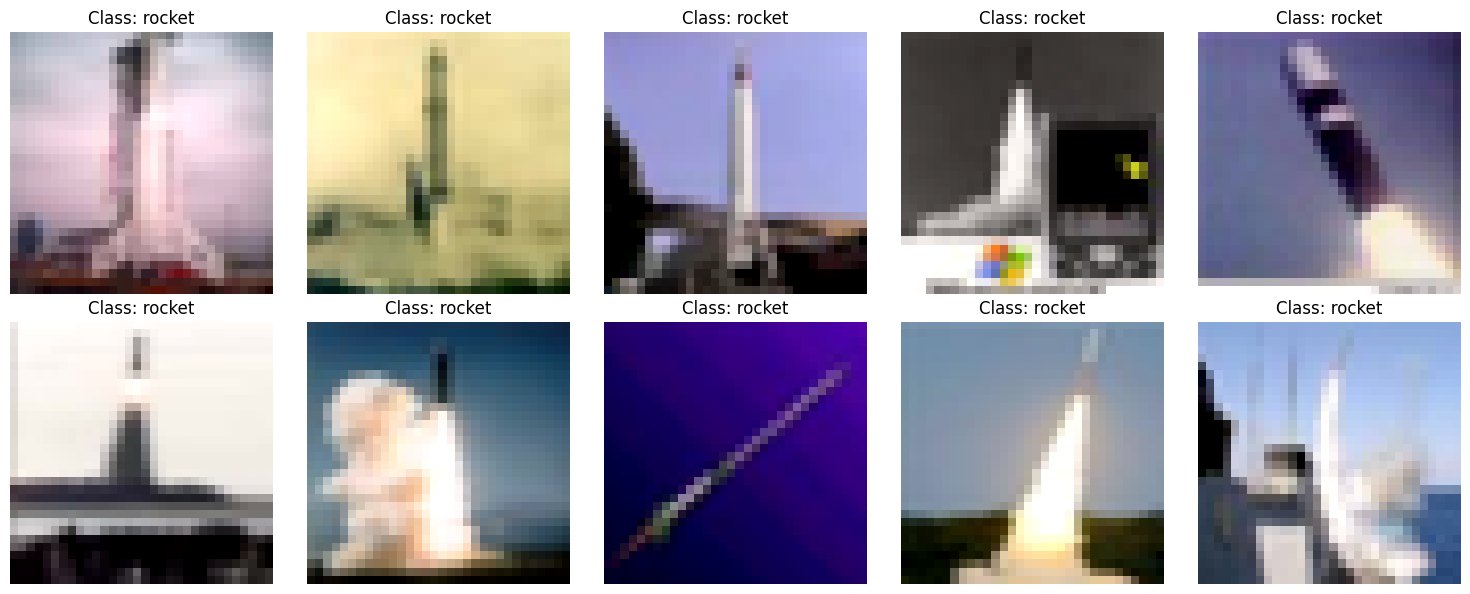

In [262]:
show_images_of_class(val_set, target_class=69, num_images=10, class_names=cifar100_labels)

In [218]:
soft_model.predict_single_with_probs(test_set[index][0])

(array([2.5770362e-06, 4.4624735e-06, 1.9995182e-06, 1.0064914e-05,
        1.6284608e-06, 1.2205877e-05, 7.8845851e-06, 8.4370220e-07,
        3.8330991e-06, 2.8034472e-05, 1.1963665e-06, 4.3324426e-06,
        1.6183814e-05, 6.6330526e-06, 4.5052439e-06, 3.1718241e-06,
        3.9721081e-06, 3.5975456e-05, 8.4246976e-06, 5.7379225e-06,
        2.4829235e-06, 8.7703648e-07, 2.0068728e-06, 1.2885437e-05,
        7.2695489e-06, 4.3857071e-06, 1.1870280e-06, 6.1023807e-06,
        6.6792550e-06, 5.0073245e-06, 7.6435135e-06, 2.1691717e-06,
        6.8813047e-06, 1.4289651e-06, 9.5023734e-06, 8.6302452e-06,
        5.9639751e-06, 5.3825511e-06, 1.4864263e-05, 5.5207001e-06,
        1.6445523e-05, 1.4577539e-05, 2.0413111e-06, 1.2414303e-06,
        1.4998668e-05, 9.8404344e-06, 4.4142803e-06, 1.6625603e-06,
        4.6941154e-06, 7.9882284e-06, 5.6379486e-06, 4.1061940e-06,
        3.5714147e-06, 2.6143155e-06, 8.2253227e-06, 3.5838348e-06,
        2.0103424e-05, 5.2751438e-06, 1.5518164e

### Soft Voting 

In [145]:
def evaluate_soft(des_model, dataloader):
    total = 0
    correct = 0
    
    with torch.no_grad():
        for imgs, labels in tqdm(dataloader, desc="Testing SoftVoting"):
            imgs, labels = imgs.to(device), labels.to(device)
            
            # DES prediction (you can switch to robust or explainable prediction)
            preds = []
            for img in imgs:
                _, pred = des_model.predict_single_with_probs(
                    img
                )
                preds.append(pred)
            
            preds = torch.tensor(preds).to(device)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    
    acc = correct / total
    print(f"✅ Test Accuracy: {acc:.4f}")
    return acc

In [251]:
class SoftVotingEnsemble:
    def __init__(self, models, device='cpu'):
        self.models = models
        self.device = device
        for model in self.models:
            model.eval().to(device)

    def predict(self, images, return_probs=False):
        probs = []
        with torch.no_grad():
            for model in self.models:
                outputs = model(images.to(self.device))
                softmaxed = torch.softmax(outputs, dim=1)
                probs.append(softmaxed.cpu().numpy())
        mean_probs = np.mean(np.stack(probs), axis=0)
        if return_probs:
            return mean_probs
        return np.argmax(mean_probs, axis=1)

    def predict_single_with_probs(self, image):
        image = image.unsqueeze(0)  # Shape [1, C, H, W]
        with torch.no_grad():
            model_probs = []
            for model in self.models:
                logits = model(image.to(self.device))
                softmaxed = torch.softmax(logits, dim=1)
                model_probs.append(softmaxed.cpu().numpy())
            mean_probs = np.mean(np.stack(model_probs), axis=0)
            probs = mean_probs[0]
            pred = np.argmax(probs)
            return probs, pred

In [252]:
soft_model = SoftVotingEnsemble(trained_pool, device)

In [148]:
soft_model.predict_single_with_probs(test_set[0][0])

(array([2.78480642e-04, 4.83597454e-04, 1.19355696e-04, 3.14663397e-04,
        1.68497121e-04, 1.94360691e-04, 2.98164028e-04, 5.62427915e-04,
        1.29284599e-04, 5.00817478e-05, 6.12329459e-05, 4.70433843e-05,
        1.91624073e-04, 5.80078049e-04, 1.66103448e-04, 1.37702958e-03,
        3.56111195e-05, 2.61035003e-03, 1.95911300e-04, 3.53510084e-04,
        7.30682659e-05, 3.32845375e-04, 2.07805278e-04, 1.09000524e-04,
        5.88187031e-05, 1.82077332e-04, 1.04074323e-04, 1.30192377e-04,
        5.72792269e-05, 1.53765210e-03, 9.78801254e-05, 5.21290232e-04,
        1.43551108e-04, 1.42526045e-03, 5.80670712e-05, 1.36964256e-04,
        1.22757061e-04, 4.39382577e-03, 2.64498929e-04, 1.47279992e-04,
        1.98868598e-04, 1.13020615e-04, 3.65609158e-04, 2.14717264e-04,
        1.07546759e-04, 7.11971297e-05, 6.81941601e-05, 7.88324629e-04,
        1.97014451e-04, 5.17652277e-03, 1.68964980e-04, 7.26629878e-05,
        9.26024258e-01, 2.27552795e-04, 1.74866364e-04, 2.048020

In [253]:
# =========================
# Run Test
# =========================
test_acc = evaluate_soft(soft_model, testloader)

Testing SoftVoting: 100%|███████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]

✅ Test Accuracy: 0.7890


### Attack 

In [263]:
from torch.utils.data import TensorDataset, DataLoader
from art.attacks.evasion import ProjectedGradientDescent
from art.estimators.classification import PyTorchClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from collections import defaultdict

In [264]:
print("Attacked")
TARGET_MODEL_INDEX = 2 
EPSILON = 0.05

target_model = trained_pool[TARGET_MODEL_INDEX]  
target_model = target_model.to(device).eval() 

dummy_optimizer = torch.optim.Adam(target_model.parameters())
loss_fn = nn.CrossEntropyLoss() 

# Wrap it for ART
art_classifier = PyTorchClassifier(
    model=target_model,
    loss=loss_fn,
    optimizer=dummy_optimizer,
    input_shape=(1, 32, 32),  
    nb_classes=100,
    clip_values=(0.0, 1.0),
)

x_test = []
y_test = []
    
for img, label in test_set: 
    x_test.append(img.numpy())
    y_test.append(label)
    
x_test = np.array(x_test)
y_test = np.array(y_test)

pgd_attack = ProjectedGradientDescent(estimator=art_classifier, eps=EPSILON, eps_step=0.01, max_iter=100)
x_test_adv = pgd_attack.generate(x=x_test) 

Attacked


PGD - Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [265]:
adv_tensor = torch.tensor(x_test_adv).float()
labels_tensor = torch.tensor(y_test).long()
adv_dataset = TensorDataset(adv_tensor, labels_tensor)

adv_test_loader = DataLoader(adv_dataset, batch_size=1, shuffle=False)

In [266]:
evaluate_model_pool(trained_pool, adv_test_loader, device_name, model_names)

VGG19           → Accuracy: 68.40%, Loss: 1.6955
ResNet50        → Accuracy: 72.60%, Loss: 1.1488
DenseNet169     → Accuracy: 46.40%, Loss: 3.7243
GoogleNet       → Accuracy: 69.60%, Loss: 1.2253
InceptionV3     → Accuracy: 72.80%, Loss: 1.2081


In [267]:
# =========================
# Run Test
# =========================
test_acc = evaluate_soft(soft_model, adv_test_loader)

Testing SoftVoting: 100%|███████████████████████████████████████████| 1000/1000 [00:52<00:00, 19.15it/s]

✅ Test Accuracy: 0.7460


In [268]:
# =========================
# Run Test
# =========================
# Assume `vision_des` is already created & trained
test_acc = evaluate_des(des_model, adv_test_loader)

Testing VisionDES: 100%|████████████████████████████████████████████| 1000/1000 [03:27<00:00,  4.82it/s]

✅ Test Accuracy: 0.7440


#### Double Attack 

In [269]:
print("Attacked")
TARGET_MODEL_INDEX = 3 
EPSILON = 0.05

target_model = trained_pool[TARGET_MODEL_INDEX]  
target_model = target_model.to(device).eval() 

dummy_optimizer = torch.optim.Adam(target_model.parameters())
loss_fn = nn.CrossEntropyLoss() 

# Wrap it for ART
art_classifier = PyTorchClassifier(
    model=target_model,
    loss=loss_fn,
    optimizer=dummy_optimizer,
    input_shape=(1, 32, 32),  
    nb_classes=100,
    clip_values=(0.0, 1.0),
)


pgd_attack = ProjectedGradientDescent(estimator=art_classifier, eps=EPSILON, eps_step=0.01, max_iter=100)
x_test_adv_double = pgd_attack.generate(x=x_test_adv) 

Attacked


PGD - Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [270]:
adv_tensor = torch.tensor(x_test_adv_double).float()
labels_tensor = torch.tensor(y_test).long()
adv_dataset_double = TensorDataset(adv_tensor, labels_tensor)

adv_test_loader_double = DataLoader(adv_dataset_double, batch_size=1, shuffle=False)

In [271]:
evaluate_model_pool(trained_pool, adv_test_loader_double, device_name, model_names)

VGG19           → Accuracy: 64.90%, Loss: 1.8459
ResNet50        → Accuracy: 66.70%, Loss: 1.3036
DenseNet169     → Accuracy: 48.30%, Loss: 2.9324
GoogleNet       → Accuracy: 38.60%, Loss: 4.4135
InceptionV3     → Accuracy: 69.40%, Loss: 1.3995


In [272]:
# =========================
# Run Test
# =========================
test_acc = evaluate_soft(soft_model, adv_test_loader_double) 

Testing SoftVoting: 100%|███████████████████████████████████████████| 1000/1000 [00:38<00:00, 25.76it/s]

✅ Test Accuracy: 0.6580


In [273]:
# =========================
# Run Test
# =========================
# Assume `vision_des` is already created & trained
test_acc = evaluate_des(des_model, adv_test_loader_double)

Testing VisionDES: 100%|████████████████████████████████████████████| 1000/1000 [02:58<00:00,  5.60it/s]

✅ Test Accuracy: 0.6720


### Triple Attack 

In [274]:
print("Attacked")
TARGET_MODEL_INDEX = 0 
EPSILON = 0.05

target_model = trained_pool[TARGET_MODEL_INDEX]  
target_model = target_model.to(device).eval() 

dummy_optimizer = torch.optim.Adam(target_model.parameters())
loss_fn = nn.CrossEntropyLoss() 

# Wrap it for ART
art_classifier = PyTorchClassifier(
    model=target_model,
    loss=loss_fn,
    optimizer=dummy_optimizer,
    input_shape=(1, 32, 32),  
    nb_classes=10,
    clip_values=(0.0, 1.0),
)


pgd_attack = ProjectedGradientDescent(estimator=art_classifier, eps=EPSILON, eps_step=0.01, max_iter=100)
x_test_adv_triple = pgd_attack.generate(x=x_test_adv_double) 

Attacked


PGD - Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [275]:
adv_tensor = torch.tensor(x_test_adv_triple).float()
labels_tensor = torch.tensor(y_test).long()
adv_dataset_triple = TensorDataset(adv_tensor, labels_tensor)

adv_test_loader_triple = DataLoader(adv_dataset_triple, batch_size=1, shuffle=False)

In [276]:
evaluate_model_pool(trained_pool, adv_test_loader_triple, device_name, model_names)

VGG19           → Accuracy: 34.40%, Loss: 5.4804
ResNet50        → Accuracy: 63.10%, Loss: 1.4867
DenseNet169     → Accuracy: 47.30%, Loss: 2.8496
GoogleNet       → Accuracy: 42.30%, Loss: 3.2251
InceptionV3     → Accuracy: 64.20%, Loss: 1.5892


In [277]:
# =========================
# Run Test
# =========================
test_acc = evaluate_soft(soft_model, adv_test_loader_triple) 

Testing SoftVoting: 100%|███████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.41it/s]

✅ Test Accuracy: 0.5660


In [278]:
# =========================
# Run Test
# =========================
# Assume `vision_des` is already created & trained
test_acc = evaluate_des(des_model, adv_test_loader_triple)

Testing VisionDES: 100%|████████████████████████████████████████████| 1000/1000 [02:56<00:00,  5.66it/s]

✅ Test Accuracy: 0.5820


### Test attacks 

True class: 47

Explainability Report:
Model #0: VGG
  - Competence: 0.4286
  - Feature similarity: 0.7264
  - Combined weight: 0.1686
  - Predicted class: 14 with confidence 0.9989
  - Top-5: [14, 18, 6, 62, 82] → [0.999, 0.0, 0.0, 0.0, 0.0]
--------------------------------------------------
Model #1: ResNet
  - Competence: 0.5714
  - Feature similarity: 0.9101
  - Combined weight: 0.2816
  - Predicted class: 93 with confidence 0.2884
  - Top-5: [93, 14, 63, 59, 82] → [0.288, 0.183, 0.059, 0.049, 0.032]
--------------------------------------------------
Model #2: DenseNet
  - Competence: 0.4286
  - Feature similarity: 0.7685
  - Combined weight: 0.1783
  - Predicted class: 14 with confidence 0.9487
  - Top-5: [14, 93, 26, 7, 32] → [0.949, 0.014, 0.003, 0.002, 0.002]
--------------------------------------------------
Model #3: GoogleNet
  - Competence: 0.4286
  - Feature similarity: 0.7862
  - Combined weight: 0.1824
  - Predicted class: 18 with confidence 0.6327
  - Top-5: [18, 14, 78

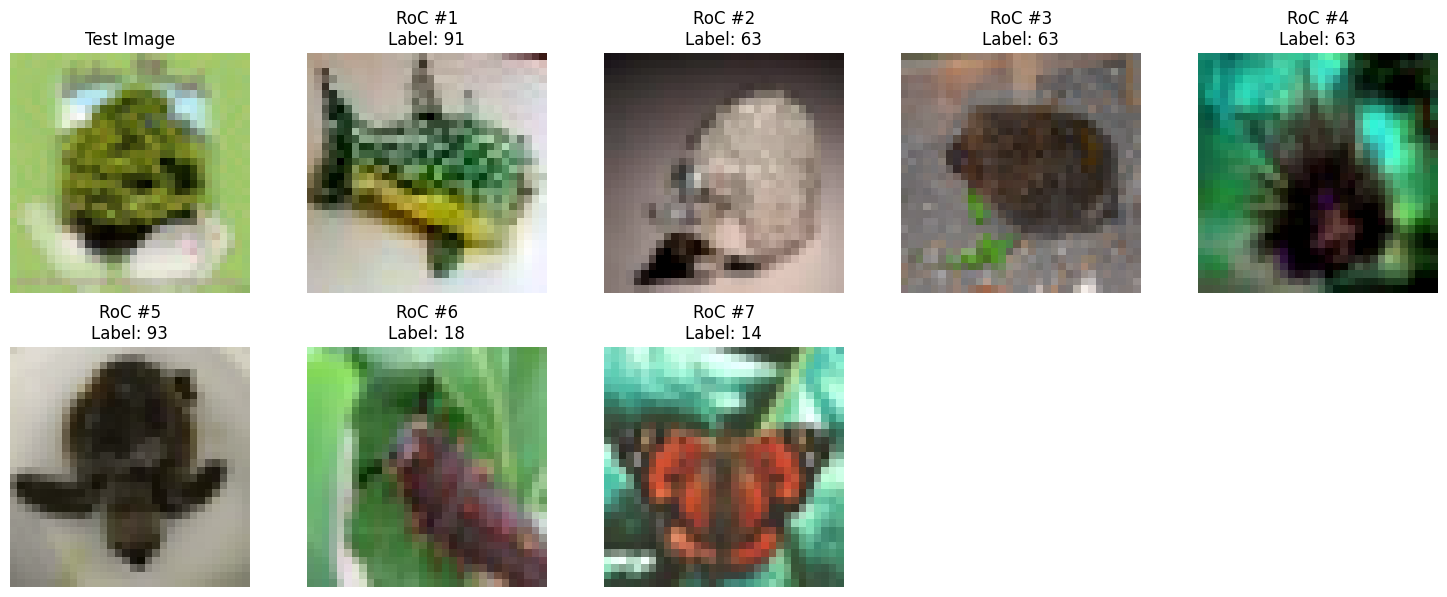

(array([5.33393293e-04, 2.25538132e-03, 2.63820589e-03, 9.67130996e-04,
        8.15599575e-04, 9.83606558e-04, 5.42419124e-03, 2.64692493e-03,
        9.97025520e-04, 1.62895513e-03, 5.10370824e-03, 3.28043330e-04,
        8.66085757e-04, 7.51849439e-04, 4.50864017e-01, 9.47398308e-04,
        9.61722340e-04, 9.19903046e-04, 1.32269174e-01, 6.24244742e-04,
        1.22880633e-03, 9.92061803e-04, 2.11391225e-03, 9.29949689e-04,
        1.07051956e-03, 1.28515356e-03, 3.01226345e-03, 5.05840406e-03,
        1.34943111e-03, 1.71964557e-03, 1.22870400e-03, 4.74499364e-04,
        6.39909785e-03, 1.37807301e-03, 3.70317692e-04, 1.27170817e-03,
        8.53034784e-04, 1.35291775e-03, 1.01480784e-03, 9.53871000e-04,
        9.39343474e-04, 1.89524028e-03, 1.12603325e-02, 4.89865080e-04,
        9.35509428e-03, 1.56435405e-03, 1.39112119e-03, 1.34492395e-02,
        1.48961751e-03, 1.85440877e-03, 1.67861953e-03, 2.94018490e-03,
        7.55280722e-03, 1.23589172e-03, 2.30385130e-03, 1.177796

In [282]:
index = 125

print(f"True class: {adv_dataset_triple[index][1]}")

des_model.predict_weighted_robust_feature_similarity(adv_dataset_triple[index][0], explain=True) 

soft_model.predict_single_with_probs(adv_dataset_triple[index][0])  

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

imagenet_mean = np.array([0.485, 0.456, 0.406])
imagenet_std = np.array([0.229, 0.224, 0.225])

def denormalize(img):
    img = img.copy()
    for i in range(3):
        img[i] = img[i] * imagenet_std[i] + imagenet_mean[i]
    return np.clip(img, 0, 1)

def visualize_adversarial_examples(x_clean, x_adv, labels=None, max_images=5):
    num_images = min(len(x_clean), max_images)
    noise_rates = []

    print(f"Showing {num_images} sample(s)...\n")

    for i in range(num_images):
        clean = denormalize(x_clean[i]).transpose(1, 2, 0)
        adv = denormalize(x_adv[i]).transpose(1, 2, 0)

        # SSIM for small images: set win_size explicitly and use channel_axis
        score = ssim(clean, adv, data_range=1.0, win_size=7, channel_axis=2)
        noise_rate = 1 - score
        noise_rates.append(noise_rate)

        fig, axs = plt.subplots(1, 2, figsize=(6, 3))
        axs[0].imshow(clean)
        axs[0].set_title("Original")
        axs[0].axis("off")

        axs[1].imshow(adv)
        axs[1].set_title(f"Adversarial\nNoise Rate: {noise_rate:.4f}")
        axs[1].axis("off")

        plt.tight_layout()
        plt.show()

    print(f"\nAverage Noise Rate (1 - SSIM): {np.mean(noise_rates):.4f}")


Showing 5 sample(s)...



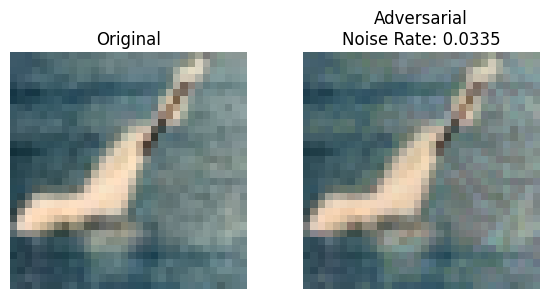

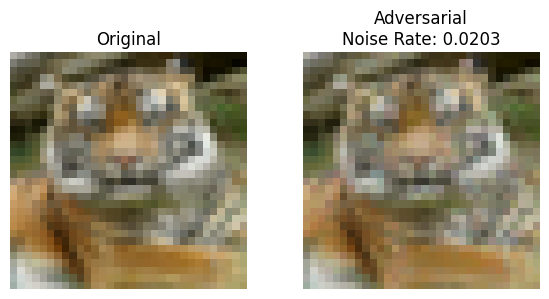

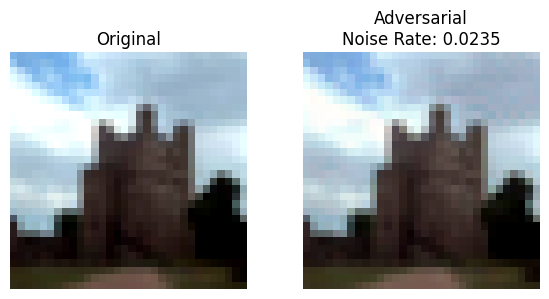

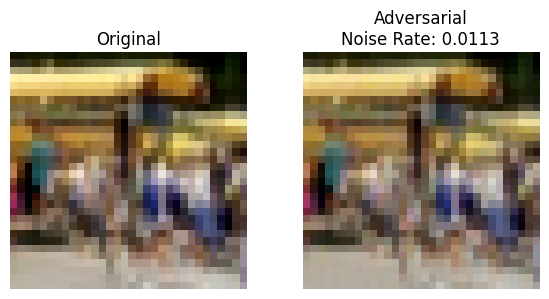

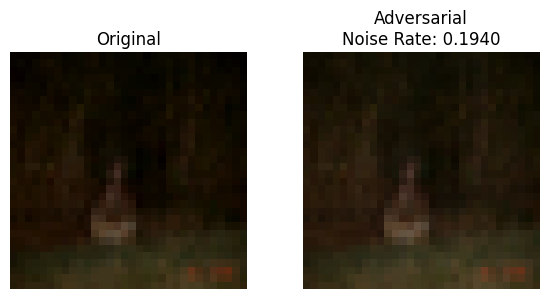


Average Noise Rate (1 - SSIM): 0.0565


In [280]:
visualize_adversarial_examples(x_test[0:255], x_test_adv_triple[0:255], max_images=5)